# Linear Regression

In [1]:
# Import neccessar libraries
import torch
from torch import nn

import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Generate Toy Dataset

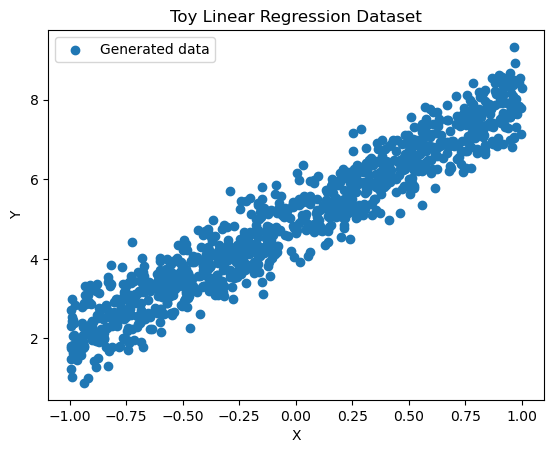

In [3]:
# Generate random input data
torch.manual_seed(42)
X = 2 * torch.rand(1000, 1) - 1  # Uniform distribution between -1 and 1

# Generate noisy output data
noise = 0.5 * torch.randn(1000, 1)  # Gaussian noise
Y = 3 * X + 5 + noise

# Plot the generated data
plt.scatter(X.numpy(), Y.numpy(), label='Generated data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Toy Linear Regression Dataset')
plt.legend()
plt.show()

In [4]:
# Split the data into train and test data
train_ratio = int(0.8*X.shape[0])
X_train, y_train = X[:train_ratio], Y[:train_ratio]
X_test, y_test = X[train_ratio: ], Y[train_ratio: ]

## Model Implementation

In [5]:
class LinearRegression(nn.Module):

    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear_layer(x)

In [6]:
model = LinearRegression().to(device)
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8300]])),
             ('linear_layer.bias', tensor([-0.4777]))])

In [7]:
# Loss function
criterion = nn.MSELoss()
# Stochastic Gradient Descent Optimization
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## Training and Evaluation

In [8]:
num_epochs = 500

epoch_lst = []
loss_lst = []
test_loss_lst = []

for epoch in range(num_epochs):   
    
    ## Training
    # Set the model to training mode
    model.train()
    # Predict for the training data
    y_pred = model(X_train)
    # Compute loss
    loss = criterion(y_pred, y_train)
    # Set gradients to zero to avoid gradient accumulation
    optimizer.zero_grad()
    # Backpropogate the errors and compute gradients
    loss.backward()
    # Update the parameters using the computed gradients
    optimizer.step()

    ## Testing
    model.eval()
    # Predict for test data
    with torch.inference_mode():
        # Make predictions for the test dataset
        test_pred = model(X_test)
        # Compute loss
        test_loss = criterion(test_pred, y_test)
    
    if epoch%10==0:
        print(f"Epoch: {epoch} | Loss: {loss.item()} | Test Loss: {test_loss.item()}")

    epoch_lst.append(epoch)
    loss_lst.append(loss.item())
    test_loss_lst.append(test_loss.item())


Epoch: 0 | Loss: 30.837059020996094 | Test Loss: 30.657697677612305
Epoch: 10 | Loss: 21.086708068847656 | Test Loss: 21.050600051879883
Epoch: 20 | Loss: 14.527863502502441 | Test Loss: 14.562829971313477
Epoch: 30 | Loss: 10.104931831359863 | Test Loss: 10.169153213500977
Epoch: 40 | Loss: 7.112888813018799 | Test Loss: 7.183220386505127
Epoch: 50 | Loss: 5.0806708335876465 | Test Loss: 5.145221710205078
Epoch: 60 | Loss: 3.693368434906006 | Test Loss: 3.746863603591919
Epoch: 70 | Loss: 2.7403299808502197 | Test Loss: 2.7812209129333496
Epoch: 80 | Loss: 2.080514430999756 | Test Loss: 2.1092331409454346
Epoch: 90 | Loss: 1.6193889379501343 | Test Loss: 1.6373023986816406
Epoch: 100 | Loss: 1.293497920036316 | Test Loss: 1.302310824394226
Epoch: 110 | Loss: 1.060166597366333 | Test Loss: 1.0615934133529663
Epoch: 120 | Loss: 0.8906257748603821 | Test Loss: 0.8862290382385254
Epoch: 130 | Loss: 0.7654228806495667 | Test Loss: 0.7565450072288513
Epoch: 140 | Loss: 0.671352744102478 | T

## Results

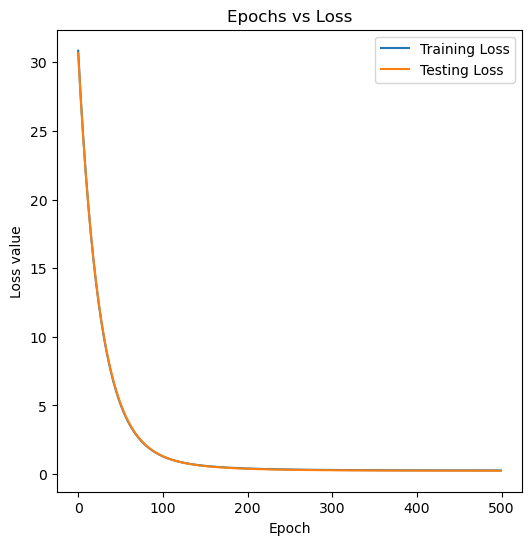

In [9]:
plt.figure(figsize=(6, 6))
# Training loss plot
plt.plot(epoch_lst, loss_lst, label='Training Loss')
# Test loss plot
plt.plot(epoch_lst, test_loss_lst, label='Testing Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

In [10]:
# Weights and Bias
params = list(model.parameters())
w = params[0].item()
b = params[1].item()

In [11]:
# Regression Line
predicted = w*X + b

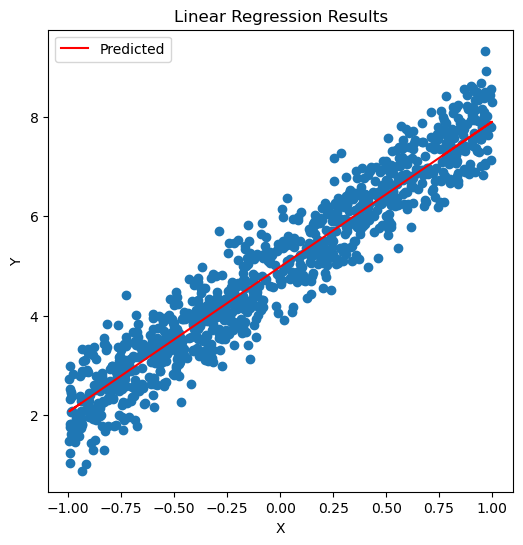

In [12]:
plt.figure(figsize=(6, 6))
# Scatter plot
plt.scatter(X.numpy(), Y.numpy())
# Plot of regression line
plt.plot(X, predicted, label="Predicted", c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Results')
plt.legend()
plt.show()